In [2]:
import pandas as pd

In [3]:
df_21 = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', encoding='cp949')
df_22 = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', encoding='cp949')
df = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv', encoding='cp949')

In [4]:
df_all_periods = pd.concat([df_21, df_22, df], axis=0)

In [5]:
credit_var = ['수신_요구불예금','수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액']

In [6]:
df_id = df[['기준년월', '고객ID', '연령대', '고객등급']].copy()
df_22_id = df_22[['기준년월', '고객ID', '연령대', '고객등급']].copy()
df_21_id = df_21[['기준년월', '고객ID', '연령대', '고객등급']].copy()

df_concat = pd.concat([df_21_id, df_22_id, df_id])
df_concat.head()

# 연월별 고객ID를 저장할 딕셔너리 생성
month_groups = df_concat.groupby('기준년월')['고객ID'].apply(set).to_dict()

# 연월 정렬
months = sorted(month_groups.keys())

# 결과 저장할 리스트
new_customers = []  # 신규 고객
churned_customers = []  # 이탈 고객

# 첫 번째 연월은 비교 대상이 없으므로 두 번째 연월부터 비교
for i in range(1, len(months)):
    prev_month = months[i - 1]  # 이전 연월
    curr_month = months[i]  # 현재 연월
    
    prev_ids = month_groups[prev_month]  # 이전 달 고객ID 집합
    curr_ids = month_groups[curr_month]  # 현재 달 고객ID 집합
    
    # 신규 고객 (이전 달에는 없었는데 이번 달에 등장한 고객)
    new = curr_ids - prev_ids
    new_customers.extend([(curr_month, cid) for cid in new])
    
    # 이탈 고객 (이전 달에는 있었는데 이번 달에는 사라진 고객)
    churned = prev_ids - curr_ids
    churned_customers.extend([(curr_month, cid) for cid in churned])

# 데이터프레임 변환 후 출력
df_new = pd.DataFrame(new_customers, columns=['기준년월', '신규고객ID'])
df_churn = pd.DataFrame(churned_customers, columns=['기준년월', '이탈고객ID'])

In [7]:
df_new['신규고객ID'].value_counts()

신규고객ID
9439988338    9
7069433326    9
6833747974    9
9731584427    8
7579316624    8
             ..
2729573712    1
2728688971    1
8067382592    1
2735701309    1
2015199230    1
Name: count, Length: 330163, dtype: int64

In [8]:
df_new[df_new['신규고객ID'] == 9439988338]

,기준년월,신규고객ID
26150,202104,9439988338
74437,202110,9439988338
94782,202201,9439988338
118688,202204,9439988338
159874,202209,9439988338
192186,202212,9439988338
215278,202302,9439988338
239830,202304,9439988338
289347,202308,9439988338


In [9]:
df_churn['이탈고객ID'].value_counts()

이탈고객ID
6833747974    10
7069433326     9
9439988338     9
7810215920     9
5906587992     8
              ..
2921625557     1
2931120084     1
2930390993     1
6797260751     1
6003916799     1
Name: count, Length: 86078, dtype: int64

In [10]:
df_churn[df_churn['이탈고객ID'] == 9439988338]

,기준년월,이탈고객ID
4299,202103,9439988338
18987,202108,9439988338
27226,202111,9439988338
37869,202203,9439988338
46297,202206,9439988338
61430,202211,9439988338
69067,202301,9439988338
75321,202303,9439988338
83019,202306,9439988338


# 두 집단 비교

In [11]:
# 한번만 실행 -> 저장용
'''
df_new.to_csv('data/df_new.csv')
df_churn.to_csv('data/df_churn.csv')
'''

"\ndf_new.to_csv('data/df_new.csv')\ndf_churn.to_csv('data/df_churn.csv')\n"

In [12]:
# 이탈/신규 횟수
churn_unq = df_churn['이탈고객ID'].unique()
new_unq = df_new['신규고객ID'].unique()

print(len(churn_unq), len(new_unq))

86078 330163


In [13]:
# 이탈 / 신규 고객 평균 금융자산
churn_cus = df_all_periods[df_all_periods['고객ID'].isin(churn_unq)][credit_var]
new_cus = df_all_periods[df_all_periods['고객ID'].isin(new_unq)][credit_var]

In [14]:
def stat_view(df):
    distribution = df.describe()
    print("=== 각 열의 분포 ===")
    print(distribution)

    print("\n=== 각 열의 평균 ===")
    means = df.mean()
    for column, mean in means.items():
        print(f"{column}: {mean:,.2f}")

In [15]:
stat_view(churn_cus)

=== 각 열의 분포 ===
           수신_요구불예금      수신_거치식예금      수신_적립식예금         수신_펀드       수신_외화예금  \
count  1.789733e+06  1.789733e+06  1.789733e+06  1.789733e+06  1.789733e+06   
mean   1.456823e+07  8.936374e+06  2.392579e+06  1.101526e+06  3.622536e+05   
std    2.254597e+07  2.191310e+07  9.108148e+06  7.425425e+06  4.071012e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    3.900000e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.800000e+07  0.000000e+00  5.000000e+05  0.000000e+00  0.000000e+00   
max    9.900000e+07  9.900000e+07  9.900000e+07  9.900000e+07  9.900000e+07   

               대출금액  
count  1.789733e+06  
mean   1.296371e+07  
std    2.694869e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.000000e+05  
max    9.900000e+07  

=== 각 열의 평균 ===
수신_요구불예금: 14,568,232.86
수신_거치식예금: 8,936,374.25
수신_적립식예금: 

In [16]:
stat_view(new_cus)

=== 각 열의 분포 ===
           수신_요구불예금      수신_거치식예금      수신_적립식예금         수신_펀드       수신_외화예금  \
count  5.415873e+06  5.415873e+06  5.415873e+06  5.415873e+06  5.415873e+06   
mean   4.992514e+06  2.938510e+06  7.093994e+05  3.809082e+05  1.193085e+05   
std    1.449588e+07  1.263745e+07  4.641069e+06  4.458570e+06  2.313174e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.300000e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    9.900000e+07  9.900000e+07  9.900000e+07  9.900000e+07  9.900000e+07   

               대출금액  
count  5.415873e+06  
mean   6.581200e+06  
std    1.823245e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.800000e+06  
max    9.900000e+07  

=== 각 열의 평균 ===
수신_요구불예금: 4,992,514.13
수신_거치식예금: 2,938,510.15
수신_적립식예금: 7

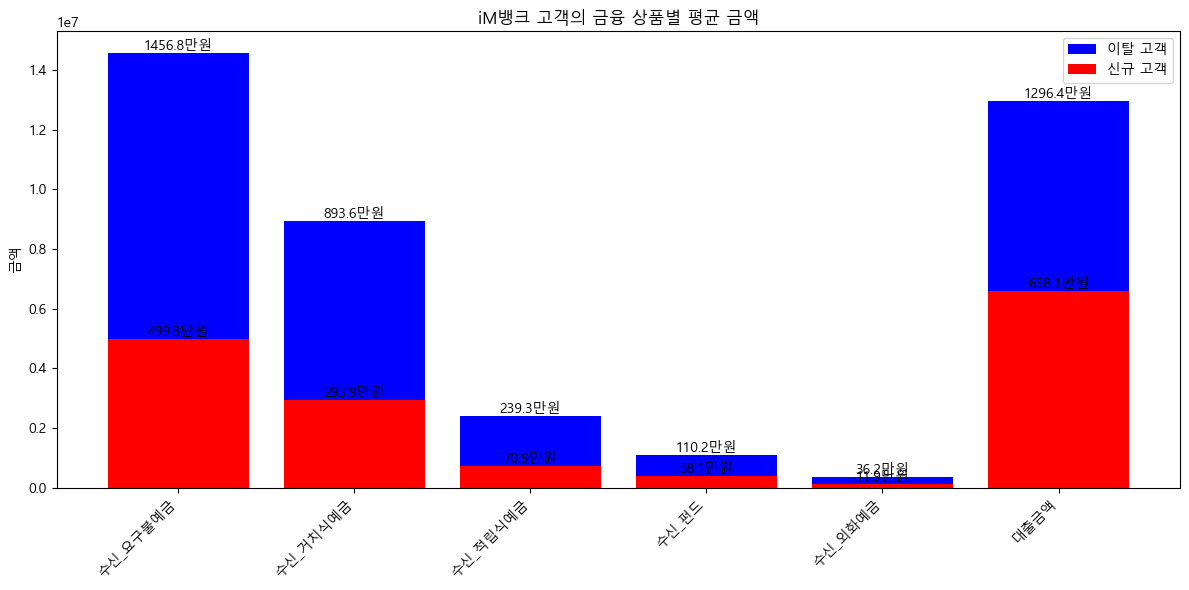

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 평균값 계산
means_churn = churn_cus.mean()
means_new = new_cus.mean()

# 막대 그래프 생성
bars_churn = plt.bar(range(len(means_churn)), means_churn, color='blue', label='이탈 고객')
bars_new = plt.bar(range(len(means_new)), means_new, color='red', label='신규 고객')

# x축 레이블 설정
plt.xticks(range(len(means_churn)), means_churn.index, rotation=45, ha='right')

# y축 단위를 백만 원 단위로 표시
plt.ylabel('금액')
plt.title('iM뱅크 고객의 금융 상품별 평균 금액')

# 막대 위에 값 표시 (단위: 백만원)
for bar in bars_churn:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/10000:.1f}만원',
             ha='center', va='bottom')
    
for bar in bars_new:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height/10000:.1f}만원',
             ha='center', va='bottom')
plt.legend()

# 그래프 레이아웃 조정
plt.tight_layout()

plt.show()

# 고객 4분류
- 3개년 카드이용 / 금융 데이터에 기록된 요소 -> 변동이 있을떄만 기록?
- 평균을 기준으로 많음 / 적음을 이분법적으로 적용, 추후 구체화 필요

In [18]:
# 카드 데이터는 용량이 크기 때문에 Polars 사용
import polars as pl

### N 데이터 기반

In [19]:
# 데이터
card_path = [
    "data\CUSTOMER_21_N.csv",
    "data\CUSTOMER_22_N.csv",
    "data\CUSTOMER_23_N.csv"
]

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_41400\871433437.py:3: SyntaxWarning: invalid escape sequence '\C'
  "data\CUSTOMER_21_N.csv",
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_41400\871433437.py:4: SyntaxWarning: invalid escape sequence '\C'
  "data\CUSTOMER_22_N.csv",
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_41400\871433437.py:5: SyntaxWarning: invalid escape sequence '\C'
  "data\CUSTOMER_23_N.csv"


In [20]:
def cus_active(df_path, unq):
    lazy_df_21 = pl.scan_csv(df_path[0])
    lazy_df_22 = pl.scan_csv(df_path[1])
    lazy_df_23 = pl.scan_csv(df_path[2]) 

    # 3개년간 데이터를 합침
    combined_df = pl.concat([lazy_df_21, lazy_df_22, lazy_df_23], how="vertical")

    # 3개년간 자본상황 변동, 카드 사용횟수 합 도출
    df_churn = combined_df.group_by(['고객ID']).agg([
        pl.col('고객ID').count().alias("금융 활성화"),
        pl.col('카드_사용횟수').sum().alias("카드 활성화")
    ])

    ''' 기존 이탈 여부대로 보고싶다면면
    .filter([
        (pl.col('고객ID').is_in(unq)),
    ])
    '''

    return df_churn.collect()

In [21]:
# 3개년 데이터 합침 + 필요한 데이터 위주 전처리리

tmp = cus_active(card_path, churn_unq)

In [ ]:
# 3개년 전체 유니크한 고객 수는 딱 2백만명

tmp['고객ID'].value_counts().sort('count', descending=False)

고객ID,count
i64,u32
8287182376,1
3813829417,1
8325473353,1
4767598126,1
8937804790,1
…,…
5083741983,1
3502400851,1
6585006534,1


In [22]:
# 금융 - 카드 활성화 평균 도출

credit_mean = tmp['금융 활성화'].mean()
card_mean = tmp['카드 활성화'].mean()

In [23]:
# 해당 평균 수치들을 기준으로 각 고객 ID에 라벨링
tmp = tmp.with_columns([
    pl.when((pl.col('카드 활성화') > card_mean) & 
            (pl.col('금융 활성화') > credit_mean))
    .then(0)
    .when(pl.col('카드 활성화') > card_mean)
    .then(1)
    .when(pl.col('금융 활성화') > credit_mean)
    .then(2)
    .otherwise(3)
    .alias('고객 활성화')
])

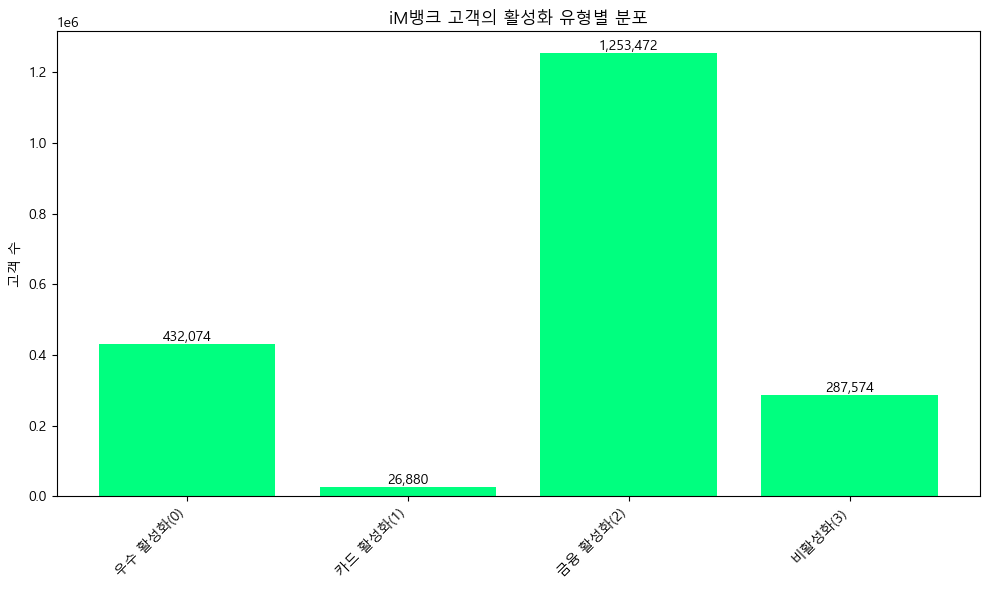

In [41]:
# 고객 활성화 분포 계산
counts = tmp.get_column('고객 활성화').value_counts().sort('고객 활성화')

plt.figure(figsize=(10, 6))

# 막대 그래프 생성
bars = plt.bar(range(len(counts)), counts['count'], color='springgreen')

# x축 레이블 설정
labels = ['우수 활성화(0)', '카드 활성화(1)', '금융 활성화(2)', '비활성화(3)']
plt.xticks(range(len(counts)), labels, rotation=45, ha='right')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# 그래프 꾸미기
plt.ylabel('고객 수')
plt.title('iM뱅크 고객의 활성화 유형별 분포')

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [ ]:
# 해당 데이터 저장 
tmp.write_csv('data/banking_point.csv')